<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/ECOSYSTEM_BALANCE_SIMULATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌿 ECOSYSTEM BALANCE SIMULATOR 🌿
Managing Natural Resources Sustainably

Welcome to the interactive ecosystem simulator!

This tool demonstrates how different management strategies affect:
• Prey and predator populations
• Resource availability
• Overall ecosystem health

Try different strategies and see if you can maintain balance!

📊 Running strategy analysis...

MANAGEMENT STRATEGY ANALYSIS

No Intervention:
  Avg Health: 89.8%
  Final Resources: 100.0%
  Effectiveness: 0.953

Maximum Harvest:
  Avg Health: 4.0%
  Final Resources: 0.0%
  Effectiveness: 0.252

Sustainable Balance:
  Avg Health: 48.3%
  Final Resources: 60.0%
  Effectiveness: 0.661

Conservation Focus:
  Avg Health: 73.1%
  Final Resources: 100.0%
  Effectiveness: 0.898

Predator Elimination:
  Avg Health: 15.0%
  Final Resources: 30.0%
  Effectiveness: 0.414

RECOMMENDED STRATEGY: No Intervention
Effectiveness Score: 0.953


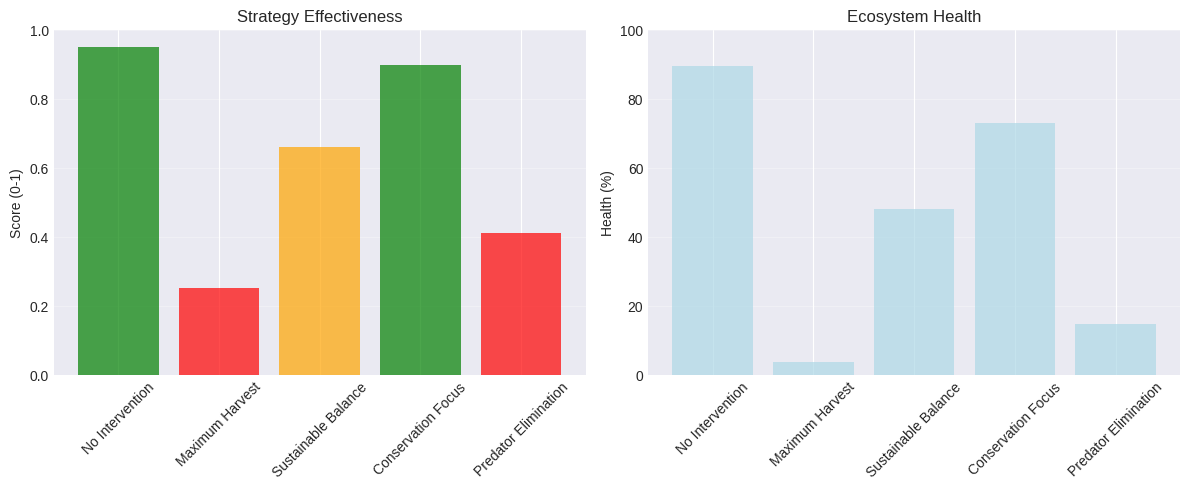


🚀 Launching Interactive Dashboard...

Instructions:
1. Adjust the sliders to set management parameters
2. Click 'Run 50 Steps' to simulate forward
3. Click 'Optimize' to let the algorithm find better parameters
4. Click 'Reset' to start over

The status panel will show the current ecosystem state.


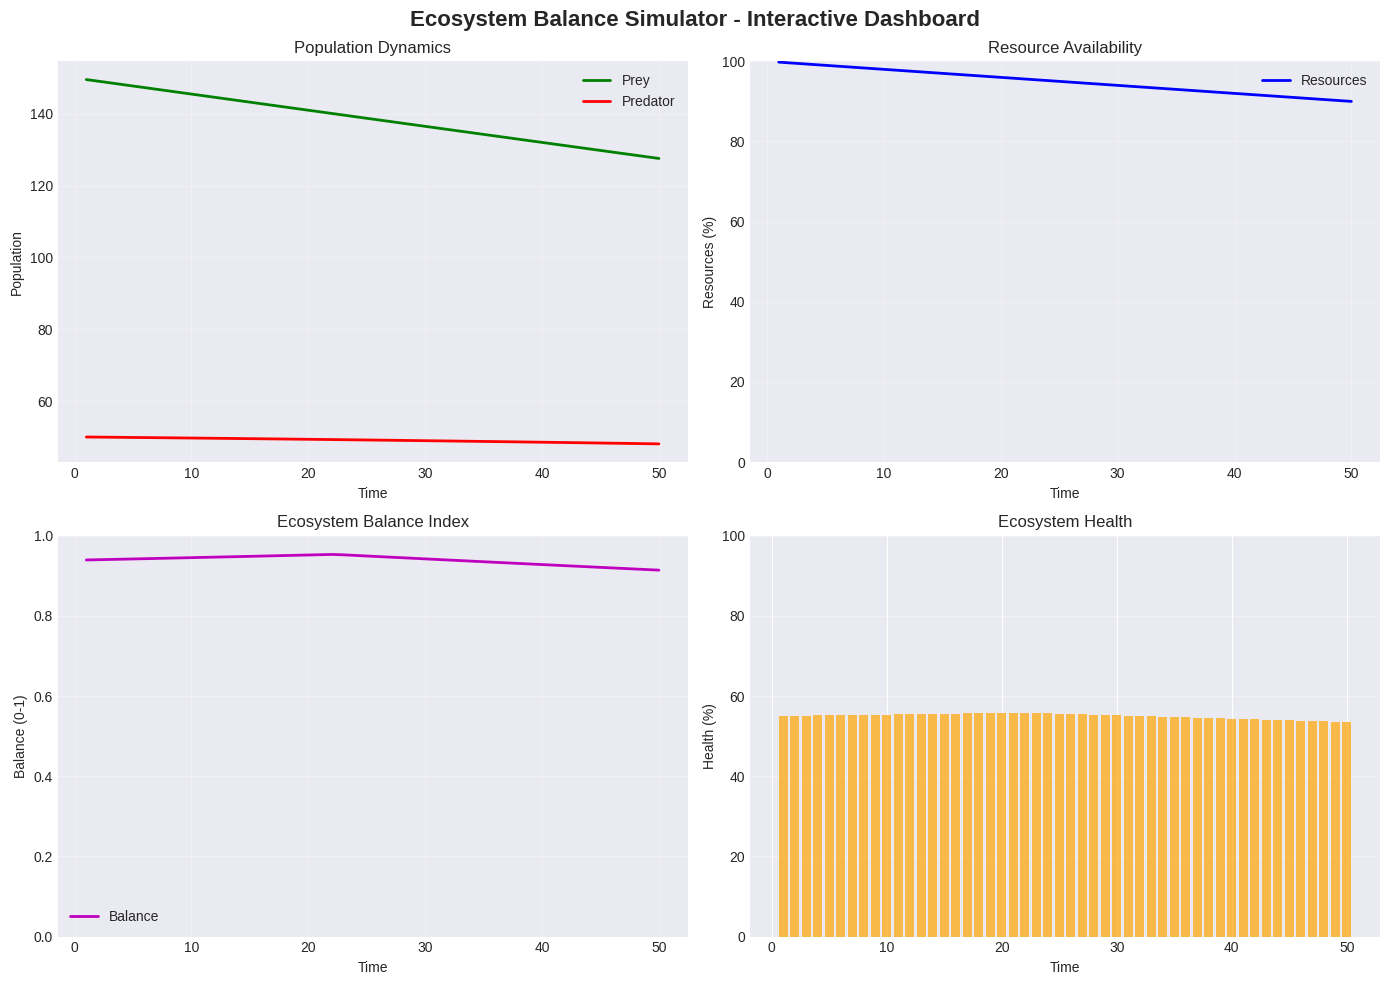


CONTROL PANEL



💡 KEY INSIGHTS

1. Balance requires constant adjustment - ecosystems are dynamic
2. Maximum extraction leads to rapid collapse
3. Sustainable practices yield better long-term results
4. Adaptive management outperforms fixed policies
5. Every intervention has ripple effects


🎯 CHALLENGE
Can you find a management strategy that:
1. Maintains ecosystem health above 70%
2. Keeps resource levels above 60%
3. Supports stable predator and prey populations
4. Achieves an effectiveness score above 0.7

Good luck! 🍀


In [1]:
# ============================================================================
# Author: Dr. Temesgen Deressa (December 3, 2025)
# This code is provided for educational purposes only.
# You may reuse or adapt it, but please credit the author appropriately.
# ============================================================================

# ============================================================================
# ECOSYSTEM BALANCE SIMULATOR: MANAGING NATURAL RESOURCES SUSTAINABLY
# A Python simulation of predator-prey dynamics with resource management
# ============================================================================
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

class EcosystemSimulator:
    """Interactive ecosystem simulation with resource management."""

    def __init__(self, prey_init=150, predator_init=50, resources_init=100):
        # Initial ecosystem state
        self.prey = prey_init
        self.predator = predator_init
        self.resources = resources_init

        # Natural parameters
        self.prey_growth_rate = 0.15
        self.predator_growth_rate = 0.08
        self.prey_death_rate = 0.01
        self.predator_death_rate = 0.10

        # Management parameters
        self.hunting_rate = 0.10
        self.resource_harvest = 0.15
        self.predator_control = 0.05
        self.replenishment_rate = 0.10

        # Optimal values
        self.optimal_prey = 140
        self.optimal_predator = 45
        self.optimal_resources = 80

        # History
        self.prey_history = [prey_init]
        self.predator_history = [predator_init]
        self.resources_history = [resources_init]
        self.balance_history = []
        self.health_history = []
        self.time = 0
        self.time_history = [0]

    def calculate_balance_index(self):
        prey_balance = 1 - min(1, abs(self.prey - self.optimal_prey) / self.optimal_prey)
        predator_balance = 1 - min(1, abs(self.predator - self.optimal_predator) / self.optimal_predator)
        resource_balance = self.resources / 100
        return (prey_balance + predator_balance + resource_balance) / 3

    def calculate_ecosystem_health(self):
        balance_index = self.calculate_balance_index()
        hunting_impact = 1 - (self.hunting_rate * 2)
        harvest_impact = 1 - (self.resource_harvest * 1.5)
        control_impact = 1 - (self.predator_control * 2)
        replenish_impact = 1 + (self.replenishment_rate * 0.5)

        health = balance_index * 100 * hunting_impact * harvest_impact * control_impact * replenish_impact
        return max(0, min(100, health))

    def update(self, dt=1):
        # Update populations
        prey_birth_rate = self.prey_growth_rate * (self.resources / 100)
        prey_death_rate = self.prey_death_rate * self.predator
        predator_birth_rate = self.predator_growth_rate * (self.prey / 100)

        self.prey += (prey_birth_rate - prey_death_rate - self.hunting_rate) * dt
        self.predator += (predator_birth_rate - self.predator_death_rate - self.predator_control) * dt

        # Update resources
        self.resources -= self.resource_harvest * dt * 2
        self.resources += self.replenishment_rate * dt

        # Ensure bounds
        self.prey = max(0, self.prey)
        self.predator = max(0, self.predator)
        self.resources = max(0, min(100, self.resources))

        # Record history
        self.time += dt
        self.prey_history.append(self.prey)
        self.predator_history.append(self.predator)
        self.resources_history.append(self.resources)
        self.balance_history.append(self.calculate_balance_index())
        self.health_history.append(self.calculate_ecosystem_health())
        self.time_history.append(self.time)

    def run_simulation(self, steps=50):
        for _ in range(steps):
            self.update()

    def optimize_management(self):
        """Intelligent optimization of management parameters."""
        prey_diff = self.prey - self.optimal_prey
        predator_diff = self.predator - self.optimal_predator
        resource_diff = self.resources - self.optimal_resources

        if prey_diff > 20:
            self.hunting_rate = min(0.3, self.hunting_rate + 0.05)
        elif prey_diff < -20:
            self.hunting_rate = max(0, self.hunting_rate - 0.05)

        if predator_diff > 10:
            self.predator_control = min(0.25, self.predator_control + 0.05)
        elif predator_diff < -10:
            self.predator_control = max(0, self.predator_control - 0.03)

        if resource_diff > 20:
            self.resource_harvest = min(0.4, self.resource_harvest + 0.05)
        elif resource_diff < -20:
            self.resource_harvest = max(0, self.resource_harvest - 0.05)

        if resource_diff < -10:
            self.replenishment_rate = min(0.3, self.replenishment_rate + 0.05)
        elif resource_diff > 10:
            self.replenishment_rate = max(0, self.replenishment_rate - 0.03)

    def reset(self):
        """Reset to initial state."""
        self.prey = self.prey_history[0]
        self.predator = self.predator_history[0]
        self.resources = self.resources_history[0]
        self.prey_history = [self.prey]
        self.predator_history = [self.predator]
        self.resources_history = [self.resources]
        self.balance_history = []
        self.health_history = []
        self.time = 0
        self.time_history = [0]
        self.hunting_rate = 0.10
        self.resource_harvest = 0.15
        self.predator_control = 0.05
        self.replenishment_rate = 0.10

def create_interactive_dashboard():
    """Create an interactive dashboard with clickable buttons."""

    # Create simulator instance
    simulator = EcosystemSimulator()
    simulator.run_simulation(steps=50)

    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Ecosystem Balance Simulator - Interactive Dashboard', fontsize=16, fontweight='bold')

    # Create initial plots
    ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

    # Plot 1: Population Dynamics
    line1, = ax1.plot(simulator.time_history[1:], simulator.prey_history[1:], 'g-', label='Prey', linewidth=2)
    line2, = ax1.plot(simulator.time_history[1:], simulator.predator_history[1:], 'r-', label='Predator', linewidth=2)
    ax1.set_title('Population Dynamics')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Population')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Resource Levels
    line3, = ax2.plot(simulator.time_history[1:], simulator.resources_history[1:], 'b-', label='Resources', linewidth=2)
    ax2.set_title('Resource Availability')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Resources (%)')
    ax2.set_ylim(0, 100)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3: Balance Index
    line4, = ax3.plot(simulator.time_history[1:], simulator.balance_history, 'm-', label='Balance', linewidth=2)
    ax3.set_title('Ecosystem Balance Index')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Balance (0-1)')
    ax3.set_ylim(0, 1)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Ecosystem Health
    health_colors = ['red' if h < 40 else 'orange' if h < 70 else 'green' for h in simulator.health_history]
    bars = ax4.bar(simulator.time_history[1:], simulator.health_history, color=health_colors, alpha=0.7)
    ax4.set_title('Ecosystem Health')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Health (%)')
    ax4.set_ylim(0, 100)
    ax4.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    # Create control widgets
    print("\n" + "="*80)
    print("CONTROL PANEL")
    print("="*80)

    # Create sliders
    hunting_slider = widgets.FloatSlider(
        value=10, min=0, max=30, step=1,
        description='Hunting (%):',
        continuous_update=False,
        style={'description_width': 'initial'}
    )

    harvest_slider = widgets.FloatSlider(
        value=15, min=0, max=40, step=1,
        description='Harvest (%):',
        continuous_update=False,
        style={'description_width': 'initial'}
    )

    control_slider = widgets.FloatSlider(
        value=5, min=0, max=25, step=1,
        description='Predator Control (%):',
        continuous_update=False,
        style={'description_width': 'initial'}
    )

    replenish_slider = widgets.FloatSlider(
        value=10, min=0, max=30, step=1,
        description='Replenishment (%):',
        continuous_update=False,
        style={'description_width': 'initial'}
    )

    # Create buttons
    run_button = widgets.Button(
        description='Run 50 Steps',
        button_style='success',
        tooltip='Run simulation for 50 time steps'
    )

    optimize_button = widgets.Button(
        description='Optimize',
        button_style='info',
        tooltip='Apply optimization algorithm'
    )

    reset_button = widgets.Button(
        description='Reset',
        button_style='warning',
        tooltip='Reset simulation to initial state'
    )

    # Create status display
    status_output = widgets.Output()

    # Create update function
    def update_plots():
        """Update all plots with current data."""
        with status_output:
            clear_output(wait=True)

            # Update plot data
            line1.set_data(simulator.time_history[1:], simulator.prey_history[1:])
            line2.set_data(simulator.time_history[1:], simulator.predator_history[1:])
            line3.set_data(simulator.time_history[1:], simulator.resources_history[1:])
            line4.set_data(simulator.time_history[1:], simulator.balance_history)

            # Update health bars
            ax4.clear()
            health_colors = ['red' if h < 40 else 'orange' if h < 70 else 'green'
                           for h in simulator.health_history]
            ax4.bar(simulator.time_history[1:], simulator.health_history,
                   color=health_colors, alpha=0.7)
            ax4.set_title('Ecosystem Health')
            ax4.set_xlabel('Time')
            ax4.set_ylabel('Health (%)')
            ax4.set_ylim(0, 100)
            ax4.grid(True, alpha=0.3, axis='y')

            # Update axis limits
            ax1.relim()
            ax1.autoscale_view()
            ax2.relim()
            ax2.autoscale_view()
            ax3.relim()
            ax3.autoscale_view()

            # Display current status
            current_health = simulator.health_history[-1] if simulator.health_history else 0
            if current_health > 70:
                status = "✅ HEALTHY - Sustainable balance"
                color = "green"
            elif current_health > 40:
                status = "⚠️ MODERATE - Needs attention"
                color = "orange"
            else:
                status = "❌ CRITICAL - Ecosystem at risk"
                color = "red"

            print(f"\nCurrent Ecosystem Status:")
            print(f"  Health: {current_health:.1f}%")
            print(f"  Prey: {simulator.prey:.1f}")
            print(f"  Predators: {simulator.predator:.1f}")
            print(f"  Resources: {simulator.resources:.1f}%")
            print(f"  Balance Index: {simulator.calculate_balance_index():.3f}")
            print(f"\nStatus: {status}")

    # Define button callbacks
    def on_run_button_clicked(b):
        """Run simulation for 50 steps."""
        with status_output:
            clear_output(wait=True)
            print("Running simulation for 50 steps...")

        simulator.run_simulation(steps=50)
        update_plots()

    def on_optimize_button_clicked(b):
        """Apply optimization algorithm."""
        with status_output:
            clear_output(wait=True)
            print("Applying optimization algorithm...")

        # Store old parameters
        old_hunting = simulator.hunting_rate
        old_harvest = simulator.resource_harvest
        old_control = simulator.predator_control
        old_replenish = simulator.replenishment_rate

        # Apply optimization
        simulator.optimize_management()

        # Update sliders to match optimized values
        hunting_slider.value = simulator.hunting_rate * 100
        harvest_slider.value = simulator.resource_harvest * 100
        control_slider.value = simulator.predator_control * 100
        replenish_slider.value = simulator.replenishment_rate * 100

        # Run simulation with new parameters
        simulator.run_simulation(steps=50)

        # Display optimization results
        with status_output:
            clear_output(wait=True)
            print("✅ Optimization Complete!")
            print(f"\nParameter Changes:")
            print(f"  Hunting: {old_hunting*100:.1f}% → {simulator.hunting_rate*100:.1f}%")
            print(f"  Harvest: {old_harvest*100:.1f}% → {simulator.resource_harvest*100:.1f}%")
            print(f"  Control: {old_control*100:.1f}% → {simulator.predator_control*100:.1f}%")
            print(f"  Replenish: {old_replenish*100:.1f}% → {simulator.replenishment_rate*100:.1f}%")

        update_plots()

    def on_reset_button_clicked(b):
        """Reset simulation."""
        with status_output:
            clear_output(wait=True)
            print("Resetting simulation to initial state...")

        simulator.reset()

        # Reset sliders
        hunting_slider.value = 10
        harvest_slider.value = 15
        control_slider.value = 5
        replenish_slider.value = 10

        update_plots()

        with status_output:
            clear_output(wait=True)
            print("✅ Simulation Reset Complete!")
            print("\nAll parameters restored to initial values.")

    # Define slider callbacks
    def on_hunting_slider_change(change):
        simulator.hunting_rate = change['new'] / 100

    def on_harvest_slider_change(change):
        simulator.resource_harvest = change['new'] / 100

    def on_control_slider_change(change):
        simulator.predator_control = change['new'] / 100

    def on_replenish_slider_change(change):
        simulator.replenishment_rate = change['new'] / 100

    # Connect callbacks
    hunting_slider.observe(on_hunting_slider_change, names='value')
    harvest_slider.observe(on_harvest_slider_change, names='value')
    control_slider.observe(on_control_slider_change, names='value')
    replenish_slider.observe(on_replenish_slider_change, names='value')

    run_button.on_click(on_run_button_clicked)
    optimize_button.on_click(on_optimize_button_clicked)
    reset_button.on_click(on_reset_button_clicked)

    # Create control panel layout
    controls_box = widgets.VBox([
        widgets.HBox([hunting_slider, harvest_slider]),
        widgets.HBox([control_slider, replenish_slider]),
        widgets.HBox([run_button, optimize_button, reset_button]),
        status_output
    ])

    # Display everything
    display(controls_box)

    # Initial status
    with status_output:
        print("✅ Dashboard Ready!")
        print("\nUse the controls above to manage the ecosystem.")
        print("\nCurrent Parameters:")
        print(f"  Hunting Rate: {simulator.hunting_rate*100:.1f}%")
        print(f"  Resource Harvest: {simulator.resource_harvest*100:.1f}%")
        print(f"  Predator Control: {simulator.predator_control*100:.1f}%")
        print(f"  Replenishment Rate: {simulator.replenishment_rate*100:.1f}%")

def run_strategy_analysis():
    """Run and display strategy comparison."""
    print("\n" + "="*80)
    print("MANAGEMENT STRATEGY ANALYSIS")
    print("="*80)

    strategies = [
        ('No Intervention', 0.00, 0.00, 0.00, 0.00),
        ('Maximum Harvest', 0.30, 0.40, 0.25, 0.00),
        ('Sustainable Balance', 0.10, 0.15, 0.05, 0.10),
        ('Conservation Focus', 0.05, 0.10, 0.02, 0.20),
        ('Predator Elimination', 0.10, 0.20, 0.30, 0.05),
    ]

    results = []
    for name, hunt, harvest, control, replenish in strategies:
        sim = EcosystemSimulator()
        sim.hunting_rate = hunt
        sim.resource_harvest = harvest
        sim.predator_control = control
        sim.replenishment_rate = replenish
        sim.run_simulation(steps=200)

        avg_health = np.mean(sim.health_history) if sim.health_history else 0
        final_resources = sim.resources_history[-1]
        effectiveness = (avg_health/100 + final_resources/100 +
                        (1 - np.std(sim.balance_history) if sim.balance_history else 0)) / 3

        results.append({
            'strategy': name,
            'health': avg_health,
            'resources': final_resources,
            'effectiveness': effectiveness
        })

    # Display results
    for r in results:
        print(f"\n{r['strategy']}:")
        print(f"  Avg Health: {r['health']:.1f}%")
        print(f"  Final Resources: {r['resources']:.1f}%")
        print(f"  Effectiveness: {r['effectiveness']:.3f}")

    # Find best strategy
    best_idx = np.argmax([r['effectiveness'] for r in results])
    best = results[best_idx]

    print(f"\n{'='*80}")
    print(f"RECOMMENDED STRATEGY: {best['strategy']}")
    print(f"Effectiveness Score: {best['effectiveness']:.3f}")
    print(f"{'='*80}")

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Effectiveness bars
    names = [r['strategy'] for r in results]
    eff_scores = [r['effectiveness'] for r in results]
    colors = ['red' if e < 0.5 else 'orange' if e < 0.7 else 'green' for e in eff_scores]

    ax1.bar(names, eff_scores, color=colors, alpha=0.7)
    ax1.set_title('Strategy Effectiveness')
    ax1.set_ylabel('Score (0-1)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylim(0, 1)
    ax1.grid(True, alpha=0.3, axis='y')

    # Health comparison
    health_scores = [r['health'] for r in results]
    ax2.bar(names, health_scores, color='lightblue', alpha=0.7)
    ax2.set_title('Ecosystem Health')
    ax2.set_ylabel('Health (%)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.set_ylim(0, 100)
    ax2.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    return results

# ============================================================================
# MAIN EXECUTION - RUN THIS IN COLAB
# ============================================================================

print("="*80)
print("🌿 ECOSYSTEM BALANCE SIMULATOR 🌿")
print("Managing Natural Resources Sustainably")
print("="*80)

print("\nWelcome to the interactive ecosystem simulator!")
print("\nThis tool demonstrates how different management strategies affect:")
print("• Prey and predator populations")
print("• Resource availability")
print("• Overall ecosystem health")
print("\nTry different strategies and see if you can maintain balance!")

# Run strategy analysis
print("\n📊 Running strategy analysis...")
results = run_strategy_analysis()

# Launch interactive dashboard
print("\n🚀 Launching Interactive Dashboard...")
print("\nInstructions:")
print("1. Adjust the sliders to set management parameters")
print("2. Click 'Run 50 Steps' to simulate forward")
print("3. Click 'Optimize' to let the algorithm find better parameters")
print("4. Click 'Reset' to start over")
print("\nThe status panel will show the current ecosystem state.")

create_interactive_dashboard()

print("\n" + "="*80)
print("💡 KEY INSIGHTS")
print("="*80)
print("""
1. Balance requires constant adjustment - ecosystems are dynamic
2. Maximum extraction leads to rapid collapse
3. Sustainable practices yield better long-term results
4. Adaptive management outperforms fixed policies
5. Every intervention has ripple effects
""")

print("\n" + "="*80)
print("🎯 CHALLENGE")
print("="*80)
print("Can you find a management strategy that:")
print("1. Maintains ecosystem health above 70%")
print("2. Keeps resource levels above 60%")
print("3. Supports stable predator and prey populations")
print("4. Achieves an effectiveness score above 0.7")
print("\nGood luck! 🍀")